In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from scipy import stats

In [2]:
data = pd.read_csv('es_sp_customers_1_year.dsv', sep=';', low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58850 entries, 0 to 58849
Data columns (total 10 columns):
CUSTOMER_ID         58850 non-null int64
ORDERS              58850 non-null int64
FIRST_ORDER_DATE    58850 non-null object
LAST_ORDER_DATE     58850 non-null object
TOTAL_CM2           58850 non-null object
NET_SALES           58850 non-null object
CM2_REL             58850 non-null object
ZTQ_ID              58850 non-null int64
START_DATE          58850 non-null object
EXPIRY_DATE         58850 non-null object
dtypes: int64(3), object(7)
memory usage: 4.5+ MB


In [4]:
data['CM2_REL'] = [i.replace(',', '.') for i in data['CM2_REL']]
data['NET_SALES'] = [i.replace(',', '.') for i in data['NET_SALES']]
data['TOTAL_CM2'] = [i.replace(',', '.') for i in data['TOTAL_CM2']]

In [5]:
data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']] = data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']].astype(float)

In [6]:
data['FIRST_ORDER_DATE'] = pd.to_datetime(data['FIRST_ORDER_DATE'], format='%d/%m/%y')

In [7]:
data['LAST_ORDER_DATE'] = pd.to_datetime(data['LAST_ORDER_DATE'], format='%d/%m/%y')

In [8]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'], format='%d/%m/%y')

In [9]:
data['EXPIRY_DATE'] = pd.to_datetime(data['EXPIRY_DATE'], format='%d/%m/%y')

In [10]:
data.head()

,CUSTOMER_ID,ORDERS,FIRST_ORDER_DATE,LAST_ORDER_DATE,TOTAL_CM2,NET_SALES,CM2_REL,ZTQ_ID,START_DATE,EXPIRY_DATE
0,4876952,2,2017-08-03,2018-02-06,36.0352,342.2055,10.53,52,2014-08-30,2017-08-30
1,6037240,17,2017-07-09,2018-05-23,-47.9082,1971.4461,-2.43,54,2014-09-24,2017-09-24
2,6836244,10,2017-07-03,2018-03-25,117.3753,951.2591,12.34,52,2017-10-27,2020-10-27
3,5916464,3,2017-07-10,2018-01-17,-4.7661,204.6051,-2.33,54,2014-11-16,2017-11-16
4,9828651,12,2017-06-05,2018-04-14,208.2841,3812.1070,5.46,54,2017-10-13,2020-10-25


In [11]:
tiers = [51, 52, 53, 54, 55, 56]

...........................................................TIER  51 ..........................................................


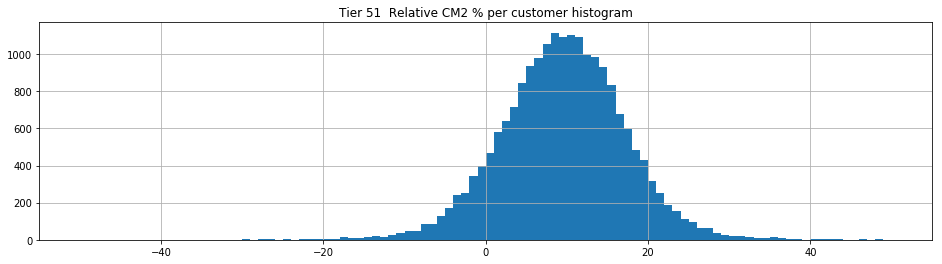

,CM2_REL
count,19947.00
mean,9.44
std,9.00
min,-634.55
25%,4.71
50%,9.62
75%,14.39
max,100.00


CM2% threshold >= 5  is the percentile 26.19
CM2% threshold >= 7  is the percentile 35.78
CM2% threshold >=  5.82  is the percentile 30 allowing us to stay with the 70% of our sample


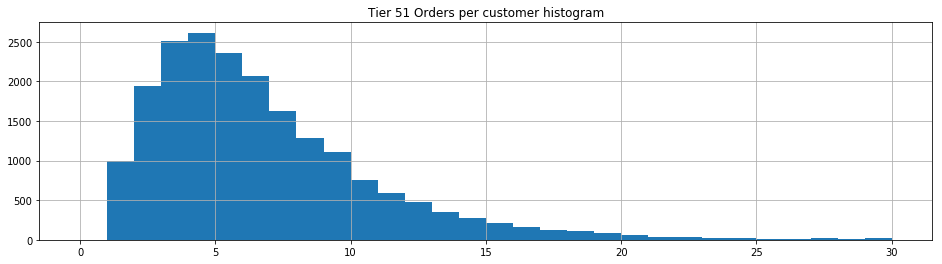

,ORDERS
count,19947.00
mean,6.34
std,4.57
min,1.00
25%,3.00
50%,5.00
75%,8.00
max,95.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  54.95  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  47.6  % from our customers
With CM2% threshold >=  5.82  and Orders >=  4.0  we keep eligible a  52.12  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  52 ..........................................................


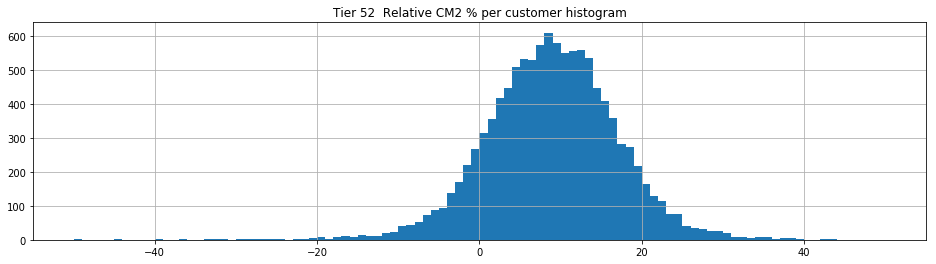

,CM2_REL
count,11183.00
mean,8.64
std,14.35
min,-848.25
25%,3.86
50%,8.92
75%,13.96
max,65.98


CM2% threshold >= 5  is the percentile 30.26
CM2% threshold >= 7  is the percentile 39.75
CM2% threshold >=  4.95  is the percentile 30 allowing us to stay with the 70% of our sample


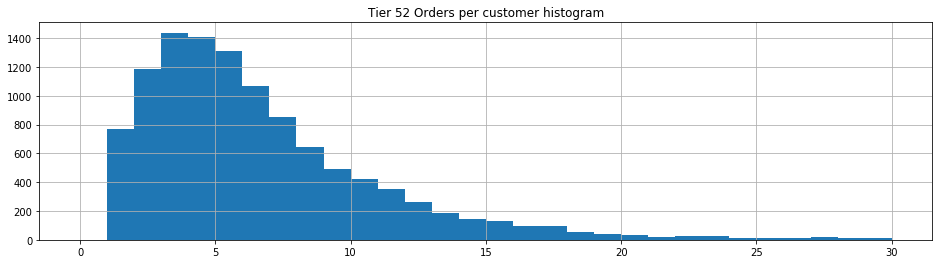

,ORDERS
count,11183.00
mean,6.32
std,5.14
min,1.00
25%,3.00
50%,5.00
75%,8.00
max,87.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  58.11  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  49.9  % from our customers
With CM2% threshold >=  4.95  and Orders >=  3.0  we keep eligible a  58.35  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  53 ..........................................................


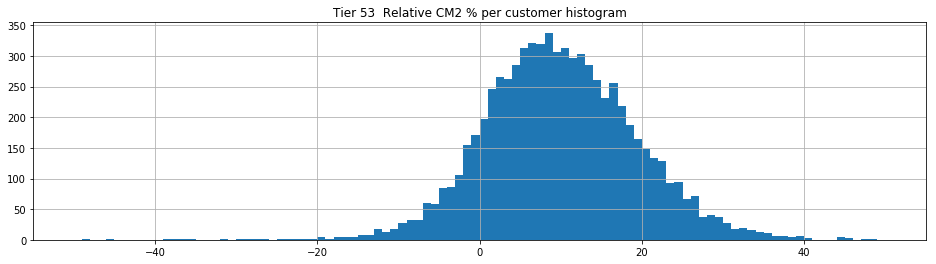

,CM2_REL
count,7282.00
mean,9.58
std,26.68
min,-2111.75
25%,3.74
50%,9.55
75%,15.98
max,56.65


CM2% threshold >= 5  is the percentile 29.91
CM2% threshold >= 7  is the percentile 38.62
CM2% threshold >=  5.012999999999997  is the percentile 30 allowing us to stay with the 70% of our sample


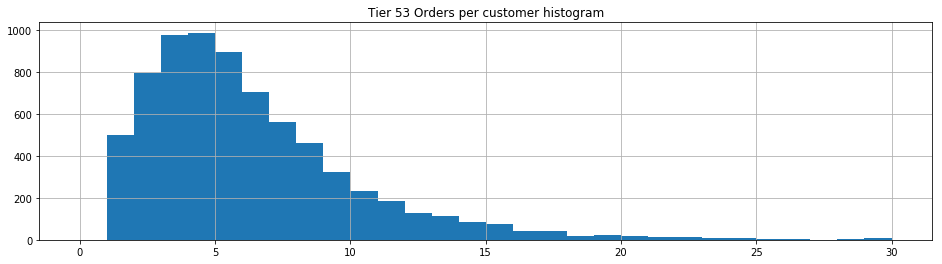

,ORDERS
count,7282.00
mean,5.93
std,4.57
min,1.00
25%,3.00
50%,5.00
75%,8.00
max,82.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  58.18  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  50.55  % from our customers
With CM2% threshold >=  5.012999999999997  and Orders >=  3.0  we keep eligible a  58.09  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  54 ..........................................................


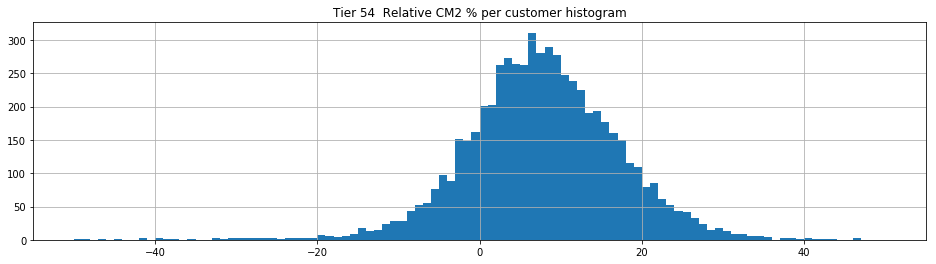

,CM2_REL
count,6031.00
mean,7.08
std,29.39
min,-2113.77
25%,2.07
50%,7.48
75%,13.48
max,55.40


CM2% threshold >= 5  is the percentile 37.99
CM2% threshold >= 7  is the percentile 47.49
CM2% threshold >=  3.21  is the percentile 30 allowing us to stay with the 70% of our sample


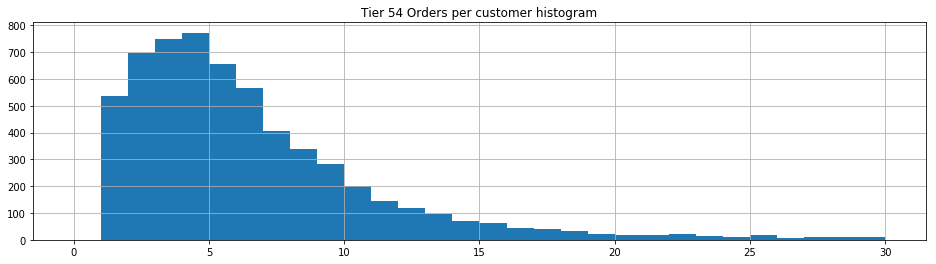

,ORDERS
count,6031.00
mean,6.54
std,12.60
min,1.00
25%,3.00
50%,5.00
75%,8.00
max,843.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  50.12  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  42.03  % from our customers
With CM2% threshold >=  3.21  and Orders >=  3.0  we keep eligible a  56.87  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  55 ..........................................................


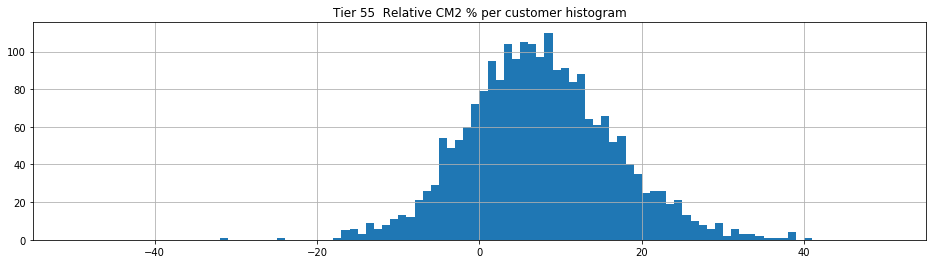

,CM2_REL
count,2230.00
mean,7.38
std,9.49
min,-115.19
25%,1.40
50%,7.05
75%,13.08
max,40.00


CM2% threshold >= 5  is the percentile 40.4
CM2% threshold >= 7  is the percentile 49.78
CM2% threshold >=  2.66  is the percentile 30 allowing us to stay with the 70% of our sample


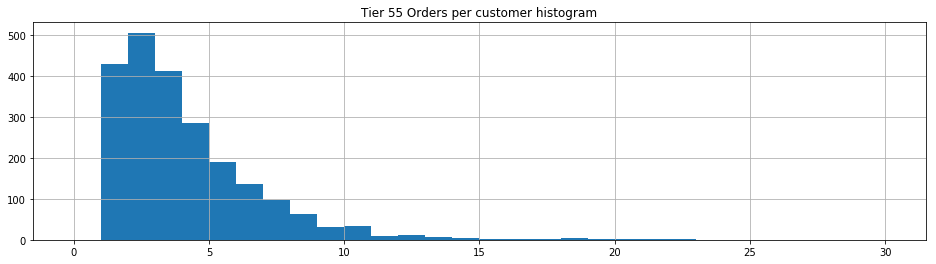

,ORDERS
count,2230.00
mean,3.62
std,2.70
min,1.00
25%,2.00
50%,3.00
75%,5.00
max,22.00


2.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  2.0  we keep eligible a  47.17  % from our customers
With CM2% threshold >= 7 and Orders >=  2.0  we keep eligible a  39.28  % from our customers
With CM2% threshold >=  2.66  and Orders >=  2.0  we keep eligible a  55.96  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  56 ..........................................................


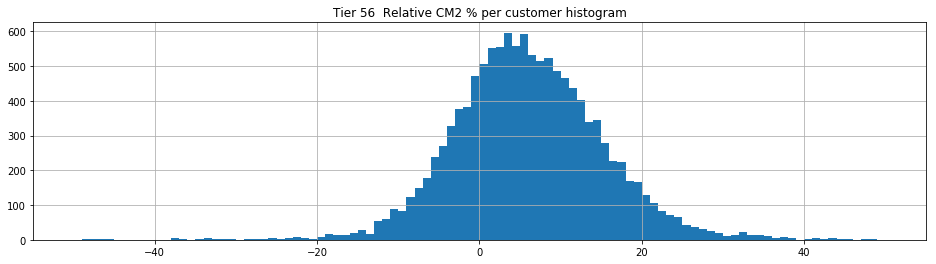

,CM2_REL
count,12177.00
mean,5.95
std,9.30
min,-94.18
25%,0.12
50%,5.59
75%,11.63
max,53.90


CM2% threshold >= 5  is the percentile 47.2
CM2% threshold >= 7  is the percentile 56.43
CM2% threshold >=  1.31  is the percentile 30 allowing us to stay with the 70% of our sample


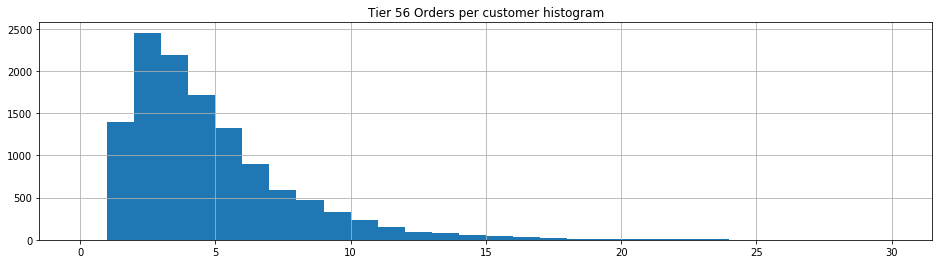

,ORDERS
count,12177.00
mean,4.43
std,5.37
min,1.00
25%,2.00
50%,4.00
75%,6.00
max,341.00


2.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  2.0  we keep eligible a  45.95  % from our customers
With CM2% threshold >= 7 and Orders >=  2.0  we keep eligible a  37.41  % from our customers
With CM2% threshold >=  1.31  and Orders >=  2.0  we keep eligible a  61.9  % from our customers
                                                                                                                    
                                                                                                                    


In [12]:
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    plt.figure(figsize=(16,4))
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50))
    title = 'Tier ' + str(tq) + '  Relative CM2 % per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2_REL'].fillna(0).describe().round(2)))
    perc_30_cm2_rel = data_tier['CM2_REL'].fillna(0).quantile(.3)
    print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 5, kind='strict').round(2))
    print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 7, kind='strict').round(2))
    print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    # CM2 € per customer
    #plt.figure(figsize=(16,4))
    #data_tier['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
    #title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
    #plt.title(title)
    #plt.show()
    #display(pd.DataFrame(data_tier['TOTAL_CM2'].describe().round(2)))
    #perc_30_cm2_abs = data_tier['TOTAL_CM2'].fillna(0).quantile(.3)
    #val1 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val2 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val3 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    #print('                                                                                                                    ')
    #print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
    #print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
    #print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
    # Orders per customer
    plt.figure(figsize=(16,4))
    data_tier['ORDERS'].hist(bins=30, range=(0, 30))
    title = 'Tier ' + str(tq) + ' Orders per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['ORDERS'].describe().round(2)))
    perc_30_orders = data_tier['ORDERS'].quantile(.3)
    val4 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val5 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val6 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    print('                                                                                                                    ')
    print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
    print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
    print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
    print('                                                                                                                    ')
    print('                                                                                                                    ')

In [13]:
data['NET_BASKET_VALUE'] = data['NET_SALES'] / data['ORDERS']

In [14]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['NET_BASKET_VALUE'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,11808.0,63.247953,25.794274,19.528150,46.206589,57.246000,73.355631,509.225540
52,6198.0,71.409731,32.674583,22.111500,50.162391,63.389721,83.593445,644.576175
53,4176.0,66.394581,30.641579,1.054100,47.240619,58.773762,77.070626,479.776925
54,3228.0,78.069483,44.956222,15.115625,52.358386,66.788604,91.419422,1190.325033
55,834.0,55.234180,21.623009,21.381775,41.482952,50.714713,63.050558,283.065860
56,5573.0,63.220559,28.137746,20.499067,45.496275,55.900450,73.166000,367.231000


In [15]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['CM2_REL'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,11808.0,9.540859,7.120011,-51.11,4.9075,9.630,14.3000,46.44
52,6198.0,8.858285,7.446325,-59.00,3.9725,8.800,13.6875,43.19
53,4176.0,9.430805,34.019911,-2111.75,3.9375,9.365,15.6700,56.07
54,3228.0,7.827423,9.238917,-108.68,2.4875,7.560,13.4025,41.73
55,834.0,6.731415,7.713125,-16.28,1.4650,6.230,11.8475,38.13
56,5573.0,5.535349,8.045850,-94.18,0.2200,5.090,10.6200,45.52


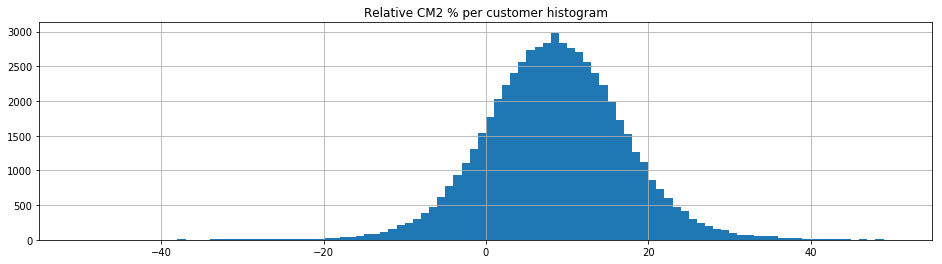

,CM2_REL
count,58850.00
mean,8.26
std,16.32
min,-2113.77
25%,2.97
50%,8.44
75%,13.90
max,100.00


CM2% threshold >= 1  is the percentile 17.87
CM2% threshold >= 2  is the percentile 21.32
CM2% threshold >= 3  is the percentile 25.1
CM2% threshold >= 4  is the percentile 29.17
CM2% threshold >= 5  is the percentile 33.52
CM2% threshold >= 6  is the percentile 38.18
CM2% threshold >= 7  is the percentile 42.89
CM2% threshold >= 8  is the percentile 47.71
CM2% threshold >= 9  is the percentile 52.78
CM2% threshold >= 10  is the percentile 57.59
CM2% threshold >=  4.19  is the percentile 30 allowing us to stay with the 70% of our sample


In [16]:
# CM2% per customer
plt.figure(figsize=(16,4))
data['CM2_REL'].hist(bins=100, range=(-50, 50))
title = 'Relative CM2 % per customer histogram'
plt.title(title)
plt.show()
display(pd.DataFrame(data['CM2_REL'].fillna(0).describe().round(2)))
perc_30_cm2_rel = data['CM2_REL'].fillna(0).quantile(.3)
print('CM2% threshold >= 1  is the percentile', stats.percentileofscore(data['CM2_REL'], 1, kind='strict').round(2))
print('CM2% threshold >= 2  is the percentile', stats.percentileofscore(data['CM2_REL'], 2, kind='strict').round(2))
print('CM2% threshold >= 3  is the percentile', stats.percentileofscore(data['CM2_REL'], 3, kind='strict').round(2))
print('CM2% threshold >= 4  is the percentile', stats.percentileofscore(data['CM2_REL'], 4, kind='strict').round(2))
print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data['CM2_REL'], 5, kind='strict').round(2))
print('CM2% threshold >= 6  is the percentile', stats.percentileofscore(data['CM2_REL'], 6, kind='strict').round(2))
print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data['CM2_REL'], 7, kind='strict').round(2))
print('CM2% threshold >= 8  is the percentile', stats.percentileofscore(data['CM2_REL'], 8, kind='strict').round(2))
print('CM2% threshold >= 9  is the percentile', stats.percentileofscore(data['CM2_REL'], 9, kind='strict').round(2))
print('CM2% threshold >= 10  is the percentile', stats.percentileofscore(data['CM2_REL'], 10, kind='strict').round(2))
print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
# CM2 € per customer
#plt.figure(figsize=(16,4))
#data['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
#title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['TOTAL_CM2'].describe().round(2)))
#perc_30_cm2_abs = data['TOTAL_CM2'].fillna(0).quantile(.3)
#val1 = float(data[(data['CM2_REL'] >= 5) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val2 = float(data[(data['CM2_REL'] >= 7) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val3 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
# Orders per customer
#plt.figure(figsize=(16,4))
#data['ORDERS'].hist(bins=30, range=(0, 30))
#title = 'Tier ' + str(tq) + ' Orders per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['ORDERS'].describe().round(2)))
#perc_30_orders = data['ORDERS'].quantile(.3)
#val4 = float(data[(data['CM2_REL'] >= 5) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val5 = float(data[(data['CM2_REL'] >= 7) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val6 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
#print('                                                                                                                    ')
#print('                                                                                                                    ')

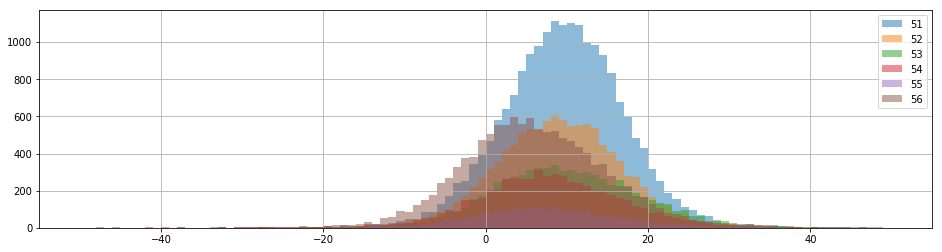

In [17]:
plt.figure(figsize=(16,4))
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    #print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50), alpha=0.5)
    plt.legend([51, 52, 53, 54, 55, 56])
plt.show()   